In [58]:
# # windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

--2023-03-03 10:52:47--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  11.0MB/s    用时 0.9s    

2023-03-03 10:52:49 (11.0 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



In [24]:
import time
import os

import numpy as np
from tqdm import tqdm

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

In [25]:
# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


In [26]:
from torchvision import transforms

# 训练集图像预处理：缩放裁剪、图像增强、转 Tensor、归一化
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

# 测试集图像预处理-RCTN：缩放、裁剪、转 Tensor、归一化
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

In [27]:
# 数据集文件夹路径
dataset_dir = 'dataset_split'

In [28]:
train_path = os.path.join(dataset_dir, 'train')
test_path = os.path.join(dataset_dir, 'val')
print('训练集路径', train_path)
print('测试集路径', test_path)

训练集路径 dataset_split/train
测试集路径 dataset_split/val


In [29]:
from torchvision import datasets

# 载入训练集
train_dataset = datasets.ImageFolder(train_path, train_transform)

# 载入测试集
test_dataset = datasets.ImageFolder(test_path, test_transform)

In [30]:
print('训练集图像数量', len(train_dataset))
print('类别个数', len(train_dataset.classes))
print('各类别名称', train_dataset.classes)

训练集图像数量 654
类别个数 16
各类别名称 ['书包', '塑料瓶', '塑料餐盒', '手机', '易拉罐', '橡皮', '毛巾', '毛绒玩具', '泡沫塑料', '玻璃瓶', '电池', '笔', '笔记本电脑', '纸', '罐头盒', '衣服']


In [56]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

--2023-03-03 19:21:30--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “SimHei.ttf.5”

SimHei.ttf.5        100%[===================>]   9.58M  21.6MB/s    用时 0.4s    

2023-03-03 19:21:31 (21.6 MB/s) - 已保存 “SimHei.ttf.5” [10050868/10050868])



In [59]:
import matplotlib.pylot as plt

ModuleNotFoundError: No module named 'matplotlib.pylot'

In [12]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [13]:
# # windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [33]:
# 各类别名称
class_names = train_dataset.classes
n_class = len(class_names)

In [34]:
class_names

['书包',
 '塑料瓶',
 '塑料餐盒',
 '手机',
 '易拉罐',
 '橡皮',
 '毛巾',
 '毛绒玩具',
 '泡沫塑料',
 '玻璃瓶',
 '电池',
 '笔',
 '笔记本电脑',
 '纸',
 '罐头盒',
 '衣服']

In [35]:
# 映射关系：类别 到 索引号
train_dataset.class_to_idx

{'书包': 0,
 '塑料瓶': 1,
 '塑料餐盒': 2,
 '手机': 3,
 '易拉罐': 4,
 '橡皮': 5,
 '毛巾': 6,
 '毛绒玩具': 7,
 '泡沫塑料': 8,
 '玻璃瓶': 9,
 '电池': 10,
 '笔': 11,
 '笔记本电脑': 12,
 '纸': 13,
 '罐头盒': 14,
 '衣服': 15}

In [36]:
# 映射关系：索引号 到 类别
idx_to_labels = {y:x for x,y in train_dataset.class_to_idx.items()}

In [37]:
idx_to_labels

{0: '书包',
 1: '塑料瓶',
 2: '塑料餐盒',
 3: '手机',
 4: '易拉罐',
 5: '橡皮',
 6: '毛巾',
 7: '毛绒玩具',
 8: '泡沫塑料',
 9: '玻璃瓶',
 10: '电池',
 11: '笔',
 12: '笔记本电脑',
 13: '纸',
 14: '罐头盒',
 15: '衣服'}

In [38]:
# 保存为本地的 npy 文件
np.save('idx_to_labels.npy', idx_to_labels)
np.save('labels_to_idx.npy', train_dataset.class_to_idx)

In [39]:
from torch.utils.data import DataLoader

In [40]:
BATCH_SIZE = 32

# 训练集的数据加载器
train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=4
                         )

# 测试集的数据加载器
test_loader = DataLoader(test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=4
                        )

In [41]:
# DataLoader 是 python生成器，每次调用返回一个 batch 的数据
images, labels = next(iter(train_loader))

In [42]:
images.shape

torch.Size([32, 3, 224, 224])

In [43]:
labels

tensor([12,  7, 11,  7, 15,  1, 15,  3,  1,  9, 11,  3,  5,  9,  9,  6,  0,  4,
         2, 15, 11,  8, 13,  5,  0,  1, 13, 12, 14, 11,  6, 11])

In [44]:
# 将数据集中的Tensor张量转为numpy的array数据类型
images = images.numpy()

In [45]:
images[5].shape

(3, 224, 224)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


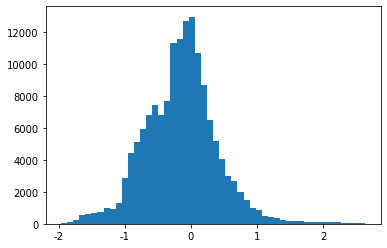

In [46]:
plt.hist(images[5].flatten(), bins=50)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'label:11')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


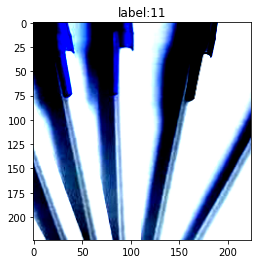

In [47]:
# batch 中经过预处理的图像
idx = 2
plt.imshow(images[idx].transpose((1,2,0))) # 转为(224, 224, 3)
plt.title('label:'+str(labels[idx].item()))

In [48]:
label = labels[idx].item()

In [49]:
label

11

In [50]:
pred_classname = idx_to_labels[label]

In [51]:
pred_classname

'笔'

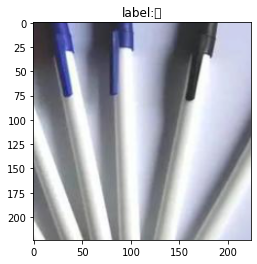

In [54]:
# 原始图像
idx = 2
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(np.clip(images[idx].transpose((1,2,0)) * std + mean, 0, 1))
plt.title('label:'+ pred_classname)
plt.show()


In [60]:
from torchvision import models
import torch.optim as optim

In [61]:
model = models.resnet18(pretrained=True) # 载入预训练模型

model.fc = nn.Linear(model.fc.in_features, n_class)

optimizer = optim.Adam(model.parameters())

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/featurize/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [62]:
model = model.to(device)

# 交叉熵损失函数
criterion = nn.CrossEntropyLoss() 

# 训练轮次 Epoch
EPOCHS = 20

In [63]:
# 获得一个 batch 的数据和标注
images, labels = next(iter(train_loader))
images = images.to(device)
labels = labels.to(device)

In [64]:
# 输入模型，执行前向预测
outputs = model(images)

In [65]:
# 获得当前 batch 所有图像的预测类别 logit 分数
outputs.shape

torch.Size([32, 16])

In [66]:
# 由 logit，计算当前 batch 中，每个样本的平均交叉熵损失函数值
loss = criterion(outputs, labels)

In [67]:
# 反向传播“三部曲”
optimizer.zero_grad() # 清除梯度
loss.backward() # 反向传播
optimizer.step() # 优化更新

In [68]:
# 获得当前 batch 所有图像的预测类别
_, preds = torch.max(outputs, 1)

In [69]:
preds

tensor([10, 15, 10, 10, 10, 10,  5,  5,  5, 10, 10, 10,  4,  1, 11, 10, 10,  9,
        11, 10,  5, 10, 10,  5, 10, 10,  4, 11,  5, 10, 10, 10],
       device='cuda:0')

In [70]:
labels

tensor([11, 14,  6,  3, 13,  0, 14,  7,  2, 12, 11, 13,  7, 13, 13,  8,  4,  3,
        15, 12,  5,  6,  1,  2,  0, 12,  7, 14, 15,  1, 13,  8],
       device='cuda:0')

In [71]:
# 遍历每个 EPOCH
for epoch in tqdm(range(EPOCHS)):

    model.train()

    for images, labels in train_loader:  # 获得一个 batch 的数据和标注
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels) # 计算当前 batch 中，每个样本的平均交叉熵损失函数值
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

100%|██████████| 20/20 [00:39<00:00,  1.99s/it]


In [72]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum()

    print('测试集上的准确率为 {:.3f} %'.format(100 * correct / total))

100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

测试集上的准确率为 71.875 %


In [74]:
torch.save(model, 'checkpoints/datset_pytorch_20220814.pth')